# Fig. 5.10 Evaluation of FH-SWF-CNL

In [1]:
from common import Identifier
from common import rename_attack
from common import rename_attack_fhswfcnl
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

In [2]:
data = pd.read_csv("../data/transformation/fhswfcnl_labeled.csv")
data["Label"].value_counts()

Password        110740
Recon            12978
Benign            2579
DoS               2048
Infiltration       963
Name: Label, dtype: int64

In [3]:
data["Attack"] = data["Label"].apply(rename_attack_fhswfcnl)
data["Attack"].value_counts()

Password        110740
Scanning         12978
Benign            2579
DoS               2048
Infiltration       963
Name: Attack, dtype: int64

In [4]:
all_attacks = pd.read_parquet("../data/netflow_sample.parquet")["Attack"].unique()
all_attacks = sorted([rename_attack(x) for x in all_attacks])
all_attacks

['Benign',
 'Bot',
 'DDoS',
 'DoS',
 'Infiltration',
 'Injection',
 'Password',
 'Scanning',
 'XSS']

In [5]:
matrices = dict()

id_ = Identifier()
id_.title = "netflow_sample"
id_.name = "cart"
id_.mod = "ext"

with open(f"../scores/matrix_fhswfcnl_{id_.as_file()}.pkl", "rb") as file:
    _, matrices[(id_.name,id_.mod)] = pickle.load(file)

id_.name = "idtree"
id_.mod = "ext"

with open(f"../scores/matrix_fhswfcnl_{id_.as_file()}.pkl", "rb") as file:
    _, matrices[(id_.name,id_.mod)] = pickle.load(file)

id_.name = "extra"
id_.mod = "red"

with open(f"../scores/matrix_fhswfcnl_{id_.as_file()}.pkl", "rb") as file:
    _, matrices[(id_.name,id_.mod)] = pickle.load(file)

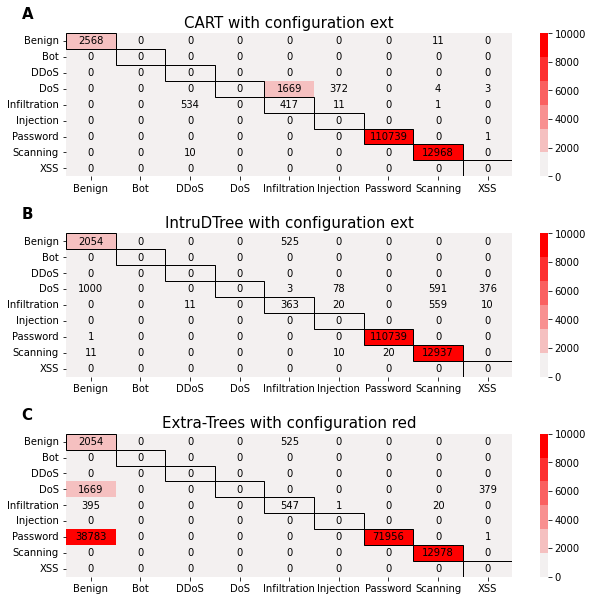

In [6]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10), sharey=True)

diagonals = [(i,i) for i in range(9)]
alpha = ["A", "B", "C"]
models = ["CART", "IntruDTree", "Extra-Trees"]

for ax, (key, matrix), i in zip(axes, matrices.items(), range(3)):
    matrix_mod = matrix
    sns.heatmap(matrix_mod, annot=True, fmt='g', annot_kws={'color':"black"}, ax=ax,
                 cmap=sns.light_palette("red"), vmin=0, vmax=10000,
                 yticklabels=all_attacks, xticklabels=all_attacks)

    name, mod = key
    ax.set_title(f"{models[i]} with configuration {mod}", fontdict={"fontsize":15}),
    ax.text(-0.1, 1.1, alpha[i], transform=ax.transAxes, size=15, weight='bold')
    for item in diagonals:
        ax.add_patch(Rectangle(item, 1, 1, fill=False, edgecolor='black', lw=1))

plt.subplots_adjust(hspace=0.4)
plt.savefig(f'../img/eval_fhswfcnl.png', bbox_inches='tight')